# Práctica 5 (Simulación, primera parte)

<span style="color:blue">Ej 1. Usa `random.choices()` para:</span>

<span style="color:blue">a) Simular una moneda.</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

In [2]:
moneda = ["cara", "cruz"]
resultado = np.random.choice(moneda)
print("a) Moneda:", resultado)


a) Moneda: cruz


<span style="color:blue">b) Simular un dado.</span>

In [3]:
dado = [1,2,3,4,5,6]
resultado = random.choice(dado)
print("Resultado del dado:", resultado)


Resultado del dado: 3


<span style="color:blue">c) Simular una moneda con P(cara) = 0.4</span>

In [4]:
moneda = ["cara", "cruz"]
resultado = np.random.choice(moneda, p=[0.4, 0.6])
print("c) Moneda sesgada:", resultado)


c) Moneda sesgada: cruz


<span style="color:blue">d) Repite el experimento de c) 1000 veces y estudia la proporción.</span>

In [7]:
from collections import Counter

moneda = ["cara", "cruz"]
resultados = np.random.choice(moneda, size=1000, p=[0.4, 0.6])
proporcion = dict(Counter(resultados))
print("d) Proporciones:", {k: v/1000 for k, v in proporcion.items()})


d) Proporciones: {np.str_('cara'): 0.396, np.str_('cruz'): 0.604}


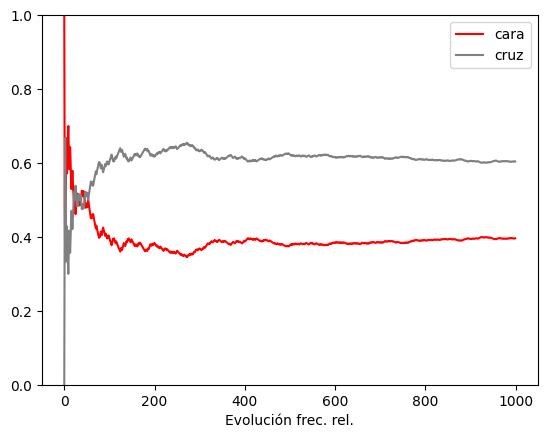

In [8]:
# Frecuencias acumuladas
frec_cara = []
frec_cruz = []
for i in range(1, 1001):
    muestra = resultados[:i]
    c = np.sum(muestra == "cara")
    z = np.sum(muestra == "cruz")
    frec_cara.append(c / i)
    frec_cruz.append(z / i)

plt.plot(frec_cara, label="cara", color="red")
plt.plot(frec_cruz, label="cruz", color="gray")
plt.ylim(0, 1)
plt.xlabel("Evolución frec. rel.")
plt.legend()
plt.show()

In [9]:
# Ejercicio 2: Urnas
print("\nEjercicio 2:")

U1 = ["R"] * 2 + ["B"] * 4
U2 = ["R"] * 5 + ["B"] * 2
U3 = ["R"] * 4 + ["B"] * 3

PR_U1 = 2 / 6
PR_U2 = 5 / 7
PR_U3 = 4 / 7
PR = (1/3) * PR_U1 + (1/3) * PR_U2 + (1/3) * PR_U3
print("a) P(R):", PR)


Ejercicio 2:
a) P(R): 0.5396825396825397


In [10]:
# b) Simular experimento
urnas = [U1, U2, U3]
urna = random.choice(urnas)
bola = random.choice(urna)
print("b) Bola extraída:", bola)

b) Bola extraída: R


In [11]:


urnas = [U1, U2, U3]

urna = random.choice(urnas)
bola = random.choice(urna)

print("b) Bola extraída:", bola)

b) Bola extraída: R


In [12]:
# c) 1000 repeticiones
bolas = []
for _ in range(1000):
    urna = random.choice(urnas)
    bola = random.choice(urna)
    bolas.append(bola)
frecuencia_R = bolas.count("R") / len(bolas)
print("c) Frecuencia de rojas:", frecuencia_R)

c) Frecuencia de rojas: 0.526


In [13]:
# d) Dos bolas
def P2R(U):
    return (Counter(U)["R"] * (Counter(U)["R"] - 1)) / (len(U)*(len(U)-1))

P2R_U1 = P2R(U1)
P2R_U2 = P2R(U2)
P2R_U3 = P2R(U3)
P2R_total = (1/3)*P2R_U1 + (1/3)*P2R_U2 + (1/3)*P2R_U3
print("d) P(2 rojas):", P2R_total)

d) P(2 rojas): 0.2761904761904762


In [14]:
bolasRojas = []
for _ in range(1000):
    urna = random.choice(urnas)
    bolas_extraidas = np.random.choice(urna, 2, replace=False)
    rojas = list(bolas_extraidas).count("R")
    bolasRojas.append(rojas)

frecuencia_2R = bolasRojas.count(2) / len(bolasRojas)
print("Frecuencia de 2 rojas:", frecuencia_2R)

Frecuencia de 2 rojas: 0.287


In [15]:
# Ejercicio 3
print("\nEjercicio 3:")

PU1_R = (PR_U1 * (1/3)) / PR
print("a) P(U1 | R):", PU1_R)




Ejercicio 3:
a) P(U1 | R): 0.20588235294117646


In [16]:
# b) Simular extracción de bola
urna_index = random.choice([0,1,2])
urna = urnas[urna_index]
bola = random.choice(urna)
print("b) Urna:", urna_index + 1, "Bola:", bola)

b) Urna: 3 Bola: B


In [17]:
# c) 10000 repeticiones
urnasElegidas = []
bolasCogidas = []
for _ in range(10000):
    i = random.choice([0,1,2])
    bola = random.choice(urnas[i])
    urnasElegidas.append(i + 1)
    bolasCogidas.append(bola)

df = pd.DataFrame({"urnas": urnasElegidas, "bolas": bolasCogidas})
df

,urnas,bolas
0,3,B
1,3,R
2,2,R
3,1,R
4,1,R
...,...,...
9995,2,B
9996,3,R
9997,1,B
9998,3,R


In [18]:
# d) Filtrar por bolas rojas
df_rojas = df[df["bolas"] == "R"]
freq_U1_given_R = len(df_rojas[df_rojas["urnas"] == 1]) / len(df_rojas)
print("d) Frecuencia U1 dado R:", freq_U1_given_R)

d) Frecuencia U1 dado R: 0.20535714285714285


In [19]:
# Ejercicio 4: Algoritmo Bayesiano
print("\nEjercicio 4:")

probRoja = np.array([2/6, 5/7, 4/7])
probBlanca = 1 - probRoja
probs = np.array([1/3, 1/3, 1/3])


Ejercicio 4:


In [20]:
# b) Elegir urna y extraer bolas
urnas = [U1, U2, U3]
numero = random.choice([0,1,2])
urna = urnas[numero]
bolas = np.random.choice(urna, 200, replace=True)
print(numero+1)
bolas

1


array(['B', 'B', 'B', 'B', 'R', 'B', 'B', 'B', 'B', 'R', 'R', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'R', 'B', 'R', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'R', 'B', 'R', 'B', 'R', 'B', 'B', 'B', 'B', 'B',
       'B', 'R', 'B', 'B', 'R', 'B', 'R', 'R', 'R', 'R', 'B', 'R', 'B',
       'B', 'B', 'B', 'R', 'B', 'R', 'R', 'B', 'R', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'R', 'B', 'B', 'R', 'B', 'B', 'R', 'B',
       'B', 'B', 'R', 'B', 'B', 'B', 'R', 'B', 'B', 'B', 'R', 'B', 'B',
       'R', 'R', 'B', 'B', 'R', 'B', 'R', 'B', 'R', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'R', 'B', 'B', 'B', 'B', 'R', 'R', 'B', 'B', 'R',
       'B', 'B', 'R', 'R', 'R', 'B', 'R', 'B', 'B', 'B', 'B', 'B', 'R',
       'B', 'R', 'B', 'B', 'B', 'R', 'B', 'R', 'B', 'B', 'R', 'B', 'B',
       'B', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'R', 'B', 'R', 'B',
       'R', 'B', 'B', 'B', 'R', 'B', 'B', 'B', 'R', 'R', 'B', 'B', 'B',
       'B', 'B', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'R', 'B', 'B

Urna elegida: 1
Probabilidades actualizadas: [1.00000000e+00 3.52341001e-35 3.00015546e-15]


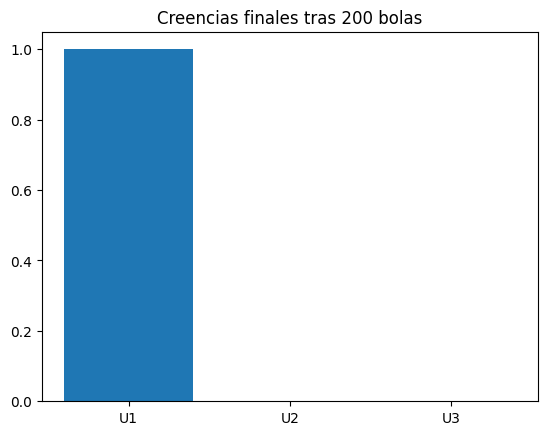

In [21]:
# c y d) Actualizar con Bayes
for bola in bolas:
    if bola == "R":
        probs *= probRoja
    else:
        probs *= probBlanca
    probs /= np.sum(probs)

print("Urna elegida:", numero+1)
print("Probabilidades actualizadas:", probs)
plt.bar(["U1", "U2", "U3"], probs)
plt.title("Creencias finales tras 200 bolas")
plt.show()

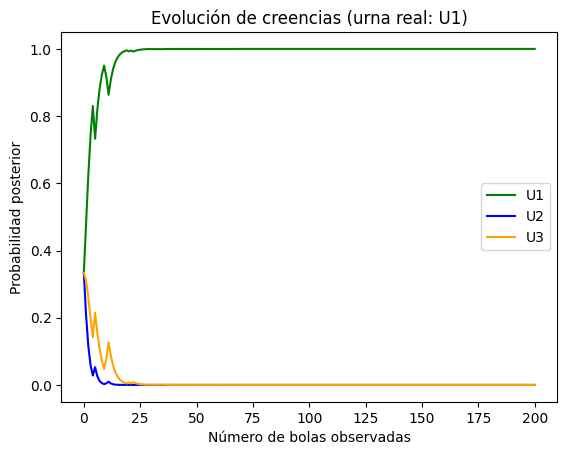

In [22]:
# e) Evolución de las creencias
probs = np.array([1/3, 1/3, 1/3])
evol = [probs.copy()]
for bola in bolas:
    if bola == "R":
        probs *= probRoja
    else:
        probs *= probBlanca
    probs /= np.sum(probs)
    evol.append(probs.copy())

evol = np.array(evol)
plt.plot(evol[:, 0], label="U1", color="green")
plt.plot(evol[:, 1], label="U2", color="blue")
plt.plot(evol[:, 2], label="U3", color="orange")
plt.legend()
plt.title(f"Evolución de creencias (urna real: U{numero+1})")
plt.xlabel("Número de bolas observadas")
plt.ylabel("Probabilidad posterior")
plt.show()

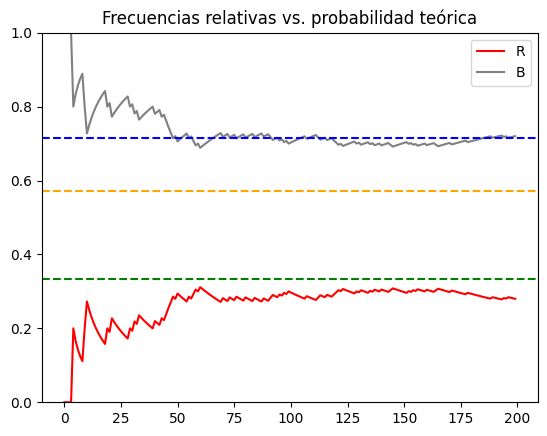

In [23]:

# f) Enfoque frecuentista
frecuencia_rojas = []
frecuencia_blancas = []
for i in range(1, 201):
    frecuencia_rojas.append(list(bolas[:i]).count("R") / i)
    frecuencia_blancas.append(list(bolas[:i]).count("B") / i)

plt.plot(frecuencia_rojas, label="R", color="red")
plt.plot(frecuencia_blancas, label="B", color="gray")
plt.axhline(2/6, color="green", linestyle="--")
plt.axhline(5/7, color="blue", linestyle="--")
plt.axhline(4/7, color="orange", linestyle="--")
plt.title("Frecuencias relativas vs. probabilidad teórica")
plt.legend()
plt.ylim(0, 1)
plt.show()
